## Principal Component Analysis (PCA)

Objectives:
- Learn how to use the scikit-learn's PCA package to solve real world problems 

## Understanding the Data

### Country Data 

After the current funding programs, International Humanitarian NGO has raised around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision have mostly related to the countries in dire need of Aid. Our job is as Data analyst is to classify the countries using the socio-economic and health factors that determine the overall development of nations. After this analysis, we need to suggest countries that the CEO needs to focus on and give the highest priority.

Data contains

1. Name of the country,
2. Death of children under five years of age per 1000 live births,
3. Exports of goods and services; Exports of goods and services given as %age of the Total GDP;
4. Imports of goods and services, Given as %age of the Total GDP;
5. Net income per person;
6. The measurement of the annual growth rate of the Total GDP;
7. The average number of years a newborn child would live if the current mortality patterns are to remain the same;
8. The number of children born to each woman if the current age-fertility rates remain the same.

So what we do is the PCA countey development analysis 

## Mount Google Drive

In [1]:
# Uncomment the below if you need to read data from your Google Drive
# Change the notebook_path to where you run the Jupyter Notebook from.

# from google.colab import drive
# import os

# drive.mount('/content/drive')

In [2]:
# notebook_path = r"/content/drive/MyDrive/Classroom/_ML2425T3(2430)/__ML2425T3(2430)_SHARED__/Labs/Lab05_PCA"
# os.chdir(notebook_path)
# !pwd

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# Installing the kneed module
!pip install kneed

# Importing Kneed to help get the elbow
from kneed import KneeLocator

# Importing Kmeans Cluster
from sklearn.cluster import KMeans


In [4]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


## Data Exploration - Country Dataset 

In [5]:
warnings.filterwarnings("ignore")
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### **Knowledge**
- **What is PCA?**  
  PCA is an **unsupervised machine learning algorithm** that helps data enthusiasts reduce the **curse of dimensionality**. In simple terms, PCA reduces the number of dimensions (features) in the data while minimizing information loss.  

- **Goal of PCA**:  
  The main objective is to find new variables called **principal components** that capture the maximum variance in the data.  

### Where can you apply PCA?

- **Data Visualization**: Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible. Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

- **Speeding Machine Learning (ML) Algorithm**: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

At an abstract level,  we take a dataset having many features, and we simplify that dataset by selecting a few ``Principal Components`` from original features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**I first thought of encoding country column because PCA only works best with numerical data. However, as Country column is a primary Identifier, encoding might lead to false artificial patterns in variance. Thus excluding from scaling and building PCA. Keeping Country column aside.**

In [7]:
df1 = df.drop(columns=['country'])

Univariate descriptive analyses

In [8]:
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


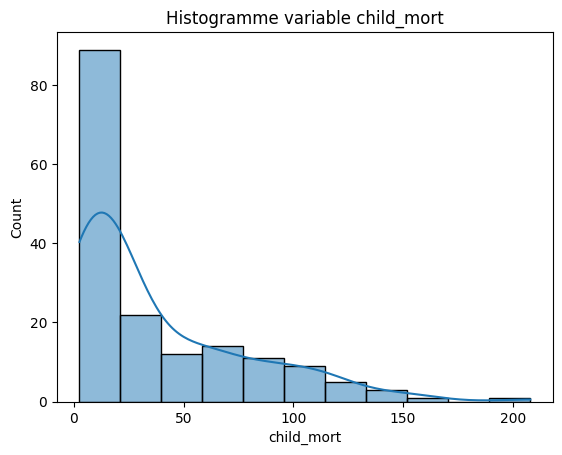

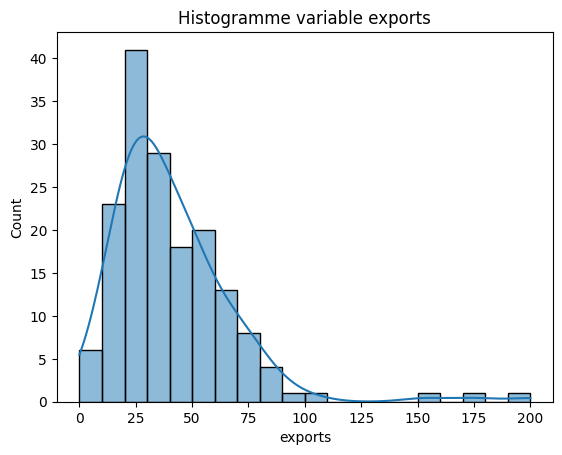

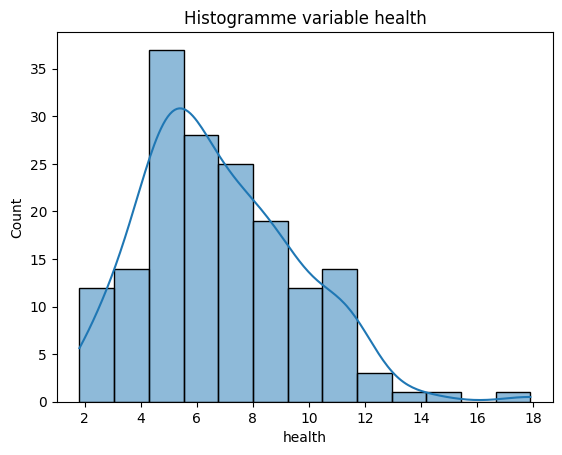

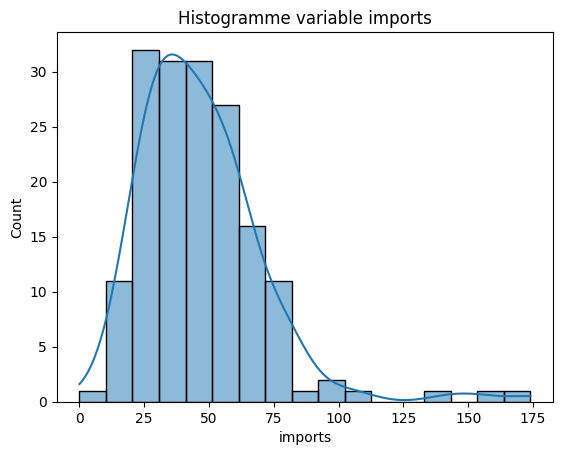

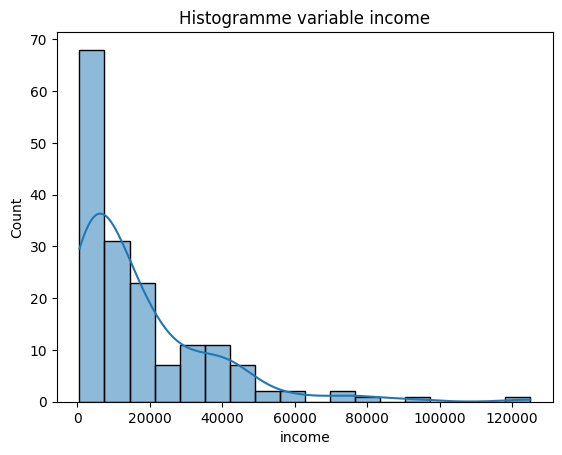

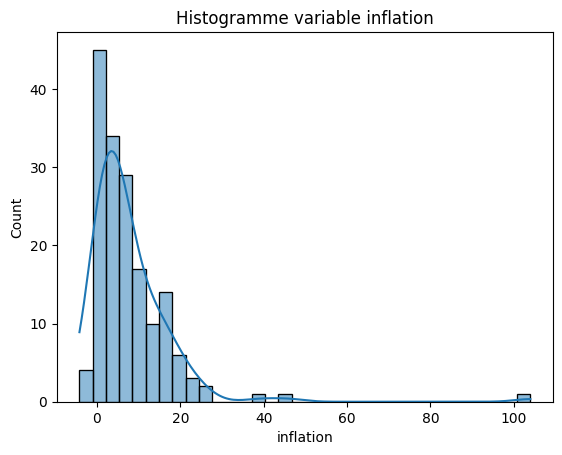

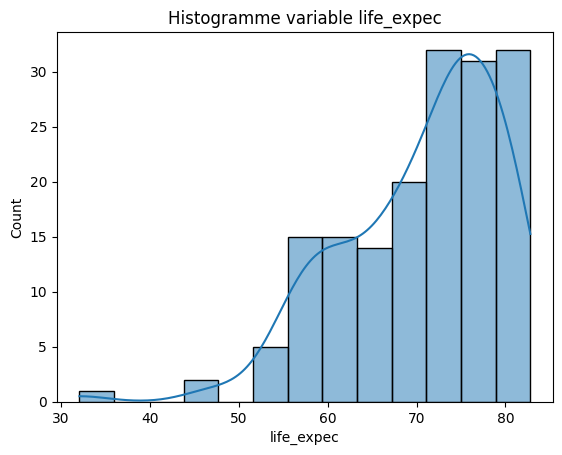

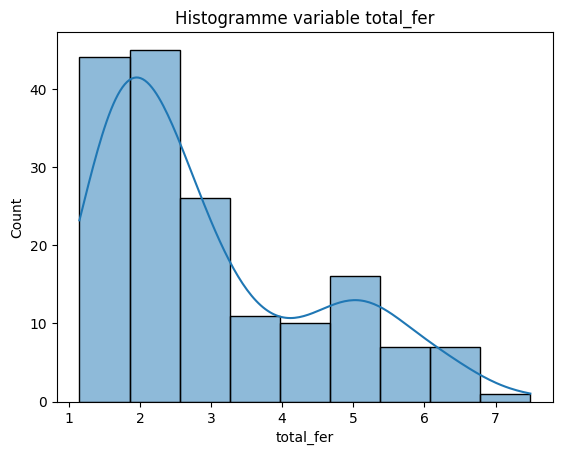

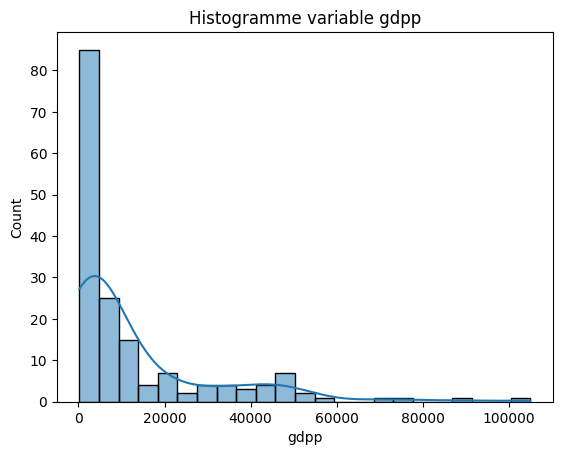

In [9]:
for col in df1.columns : 
    plt.figure()
    plt.title(f'Histogramme variable {col}')
    sns.histplot(df1,x=col,kde=True)

## Bivariate analysis

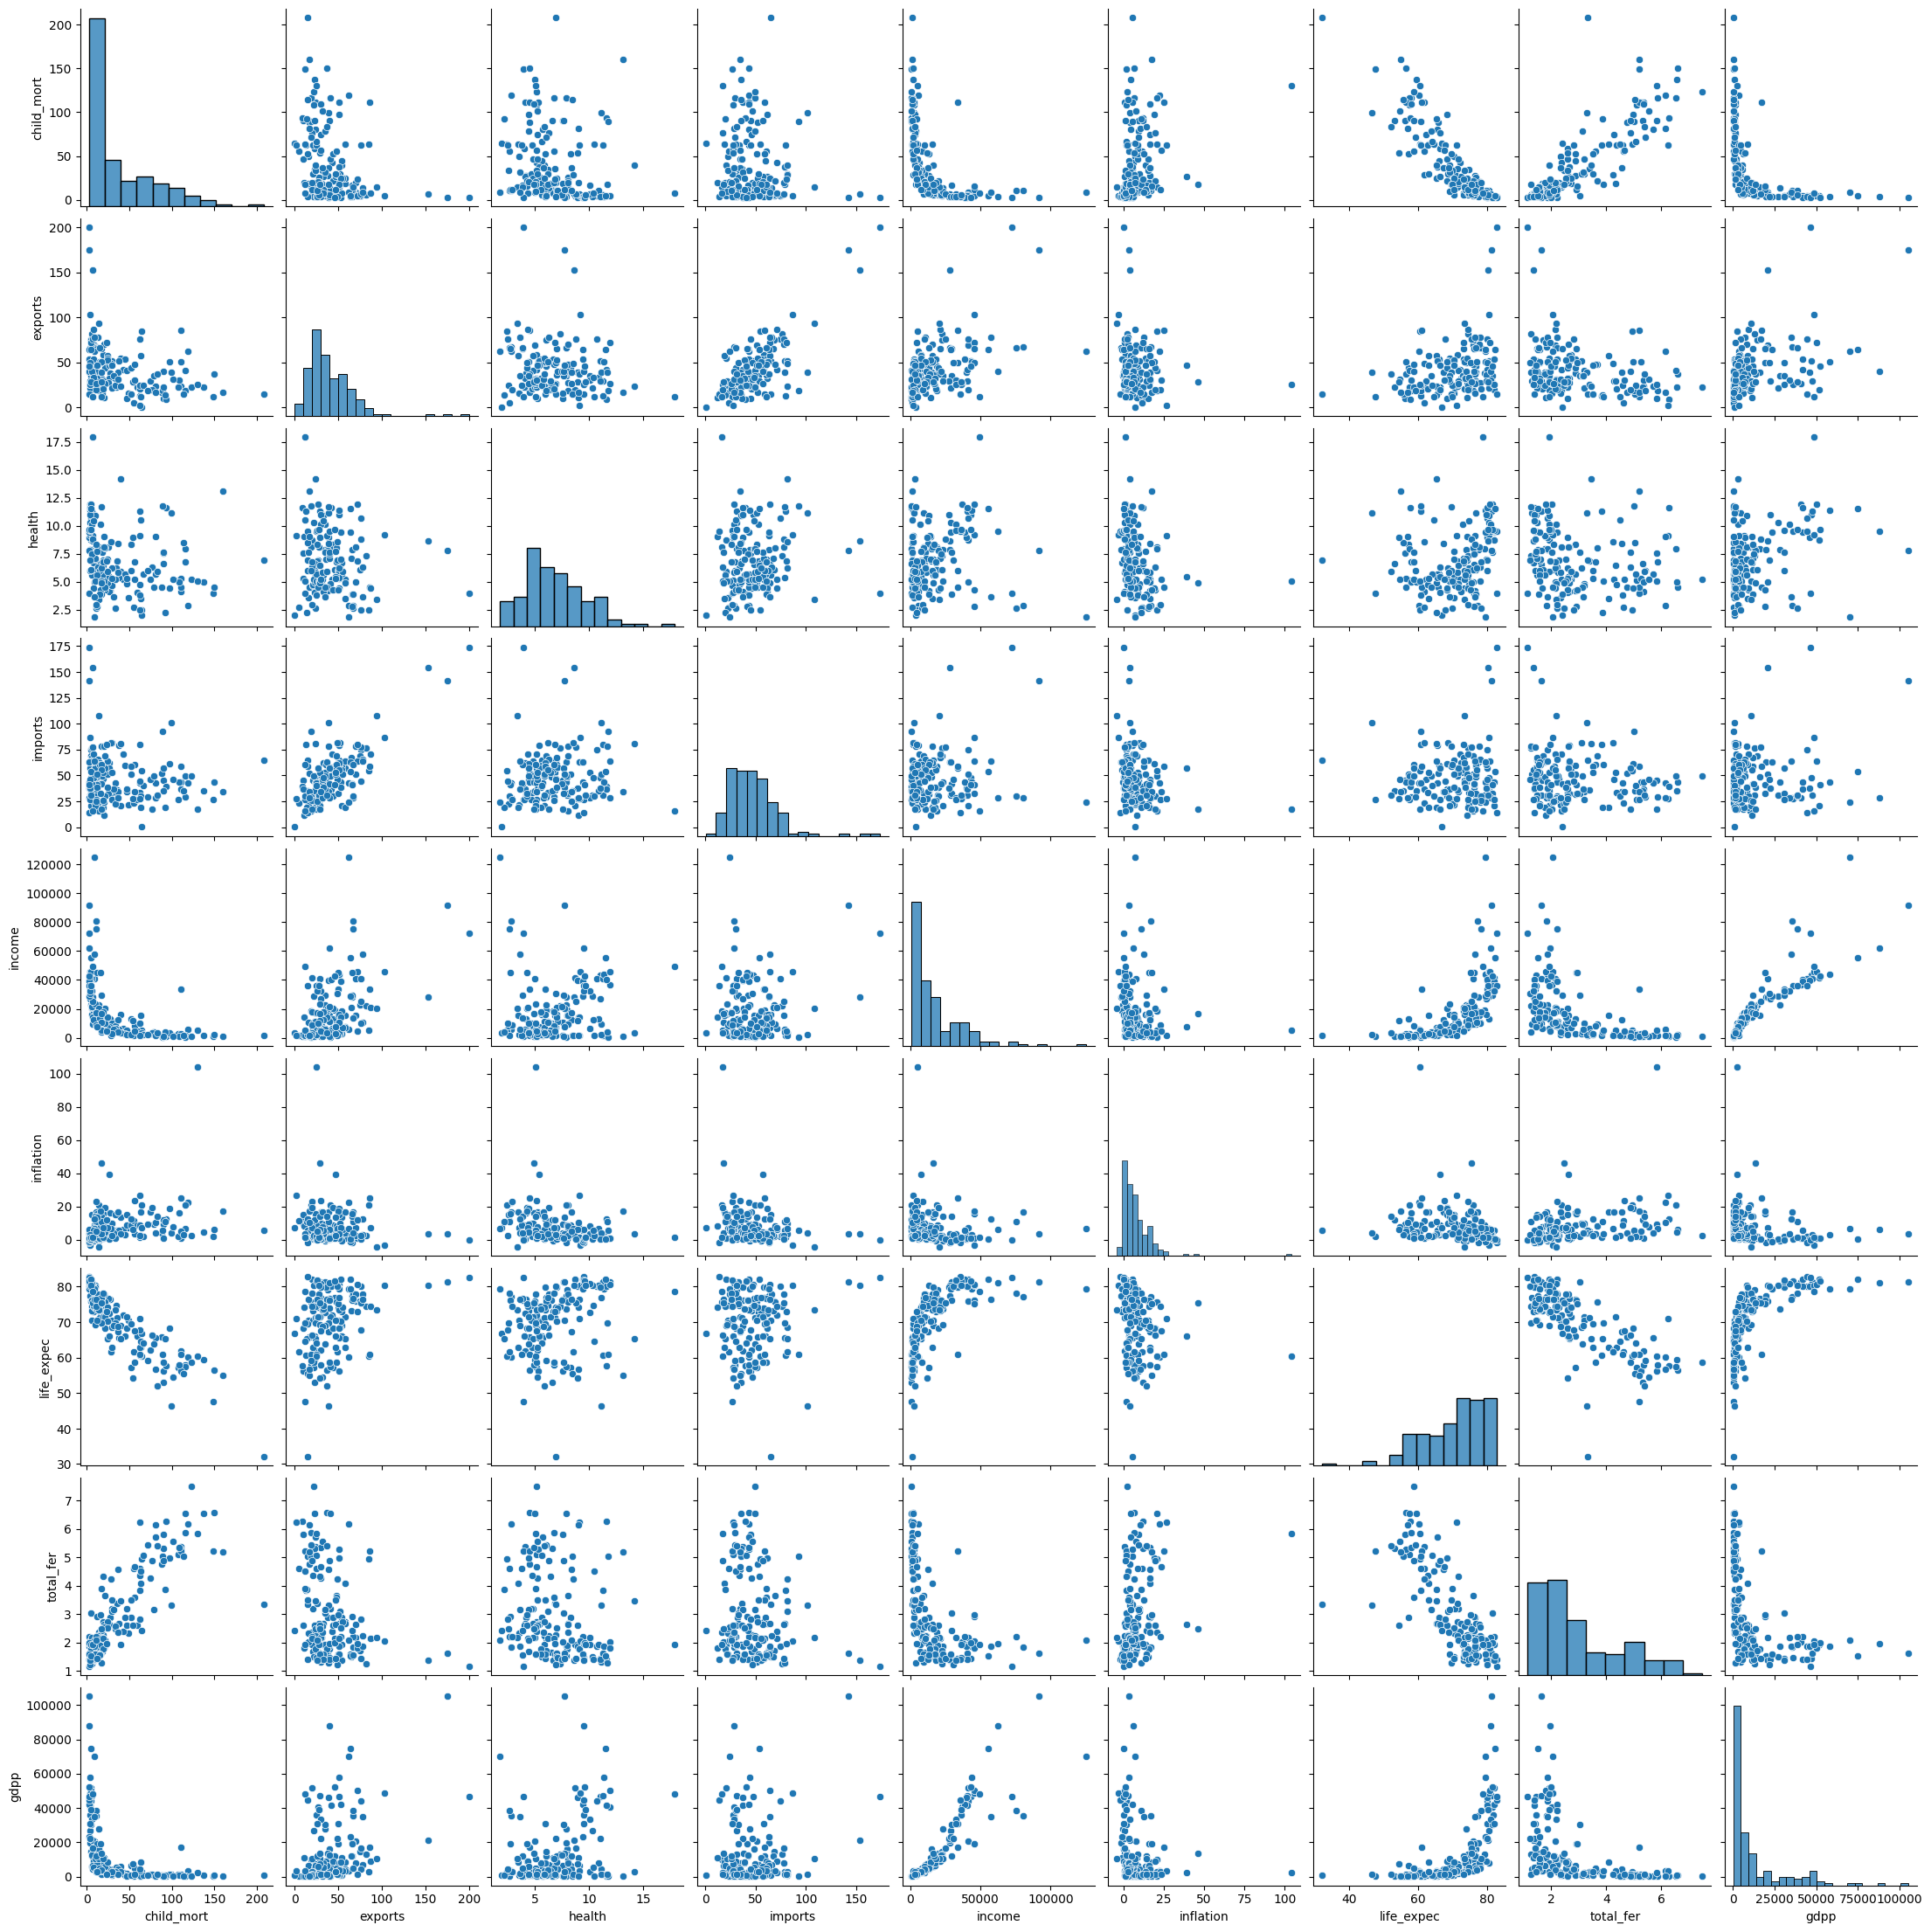

In [10]:
sns.pairplot(df);

# Standardizing columns

- Standardization is a crucial step before performing PCA because unstandardized data can introduce artificial patterns in variance, which may confuse the model.  
  - Instead of directly using libraries like `StandardScaler`, I used **pandas** and **NumPy** to manually standardize the data using the 
  Z-score formula: (observed value - mean of data)/standard deviation of data)
    

In [11]:
standard_df = (df1 - df1.mean()) / df1.std()
standard_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692
...,...,...,...,...,...,...,...,...,...
162,-0.224902,0.200315,-0.569997,0.239979,-0.736313,-0.488315,-0.849606,0.364658,-0.545273
163,-0.524935,-0.459980,-0.693776,-1.209860,-0.033442,3.606020,0.544723,-0.315728,0.029235
164,-0.371199,1.126916,0.008851,1.375892,-0.656429,0.408503,0.286097,-0.659224,-0.635842
165,0.447072,-0.405259,-0.595481,-0.515920,-0.656948,1.496416,-0.343599,1.137523,-0.635842


# Covariance Matrix

 - To analyze relationships and variance between features, a **covariance matrix** is created. The covariance matrix quantifies how much two variables change together, with values ranging from  to -∞ to +∞.  
  - Instead of relying on inbuilt functions from pandas or NumPy, I manually calculated the covariance matrix using mathematical formulas and **NumPy**.


In [12]:
centered_df = standard_df - standard_df.mean()

n_features = standard_df.shape[1]
covariance_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        covariance_matrix[i,j] = np.sum(centered_df.iloc[:, i] * centered_df.iloc[:, j])/ len(standard_df)
        
print(covariance_matrix)

[[ 0.99401198 -0.31618847 -0.19920205 -0.12644918 -0.52117541  0.28654996
  -0.88136666  0.8433974  -0.48013976]
 [-0.31618847  0.99401198 -0.11372332  0.73296538  0.51368909 -0.10665191
   0.31441852 -0.31809432  0.41621742]
 [-0.19920205 -0.11372332  0.99401198  0.09514352  0.12880269 -0.2538466
   0.20943049 -0.1954963   0.34389388]
 [-0.12644918  0.73296538  0.09514352  0.99401198  0.12167328 -0.24551527
   0.05406484 -0.15809605  0.11480656]
 [-0.52117541  0.51368909  0.12880269  0.12167328  0.99401198 -0.14687123
   0.60829802 -0.49883502  0.89020873]
 [ 0.28654996 -0.10665191 -0.2538466  -0.24551527 -0.14687123  0.99401198
  -0.2382696   0.31502334 -0.22030393]
 [-0.88136666  0.31441852  0.20943049  0.05406484  0.60829802 -0.2382696
   0.99401198 -0.75631855  0.59649579]
 [ 0.8433974  -0.31809432 -0.1954963  -0.15809605 -0.49883502  0.31502334
  -0.75631855  0.99401198 -0.45218625]
 [-0.48013976  0.41621742  0.34389388  0.11480656  0.89020873 -0.22030393
   0.59649579 -0.4521862

**lets check if our manual implementation is correct or not with the help of pandas .cov()**

**Since numpy and pandas takes sample variance i.e. n-1, we will also use n-1 in denominator in our manual formula**

In [13]:
centered_df = standard_df - standard_df.mean()

n_features = len(standard_df.columns)
covariance_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        covariance_matrix[i,j] = np.sum(centered_df.iloc[:, i] * centered_df.iloc[:, j])/ (len(standard_df) - 1) #N-1
        
print(covariance_matrix)

[[ 1.         -0.31809322 -0.20040206 -0.12721092 -0.52431502  0.28827617
  -0.8866761   0.84847811 -0.48303217]
 [-0.31809322  1.         -0.1144084   0.73738083  0.5167836  -0.10729439
   0.3163126  -0.32001055  0.41872475]
 [-0.20040206 -0.1144084   1.          0.09571668  0.12957861 -0.25537579
   0.21069212 -0.19667399  0.34596553]
 [-0.12721092  0.73738083  0.09571668  1.          0.12240625 -0.24699428
   0.05439053 -0.15904843  0.11549817]
 [-0.52431502  0.5167836   0.12957861  0.12240625  1.         -0.147756
   0.61196247 -0.50184005  0.89557143]
 [ 0.28827617 -0.10729439 -0.25537579 -0.24699428 -0.147756    1.
  -0.23970496  0.31692107 -0.22163106]
 [-0.8866761   0.3163126   0.21069212  0.05439053  0.61196247 -0.23970496
   1.         -0.76087469  0.60008913]
 [ 0.84847811 -0.32001055 -0.19667399 -0.15904843 -0.50184005  0.31692107
  -0.76087469  1.         -0.45491027]
 [-0.48303217  0.41872475  0.34596553  0.11549817  0.89557143 -0.22163106
   0.60008913 -0.45491027  1.   

In [14]:
pandas_cov = standard_df.cov().to_numpy()
pandas_cov

array([[ 1.        , -0.31809322, -0.20040206, -0.12721092, -0.52431502,
         0.28827617, -0.8866761 ,  0.84847811, -0.48303217],
       [-0.31809322,  1.        , -0.1144084 ,  0.73738083,  0.5167836 ,
        -0.10729439,  0.3163126 , -0.32001055,  0.41872475],
       [-0.20040206, -0.1144084 ,  1.        ,  0.09571668,  0.12957861,
        -0.25537579,  0.21069212, -0.19667399,  0.34596553],
       [-0.12721092,  0.73738083,  0.09571668,  1.        ,  0.12240625,
        -0.24699428,  0.05439053, -0.15904843,  0.11549817],
       [-0.52431502,  0.5167836 ,  0.12957861,  0.12240625,  1.        ,
        -0.147756  ,  0.61196247, -0.50184005,  0.89557143],
       [ 0.28827617, -0.10729439, -0.25537579, -0.24699428, -0.147756  ,
         1.        , -0.23970496,  0.31692107, -0.22163106],
       [-0.8866761 ,  0.3163126 ,  0.21069212,  0.05439053,  0.61196247,
        -0.23970496,  1.        , -0.76087469,  0.60008913],
       [ 0.84847811, -0.32001055, -0.19667399, -0.15904843, -0

and Yes! We got exact similar values.

In [15]:
standard_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<Axes: >

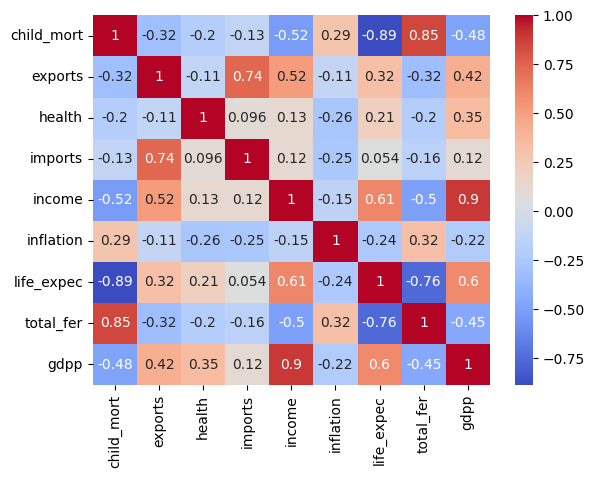

In [16]:
import seaborn as sns
sns.heatmap(covariance_matrix, annot=True, xticklabels=standard_df.columns, yticklabels=standard_df.columns, cmap='coolwarm')

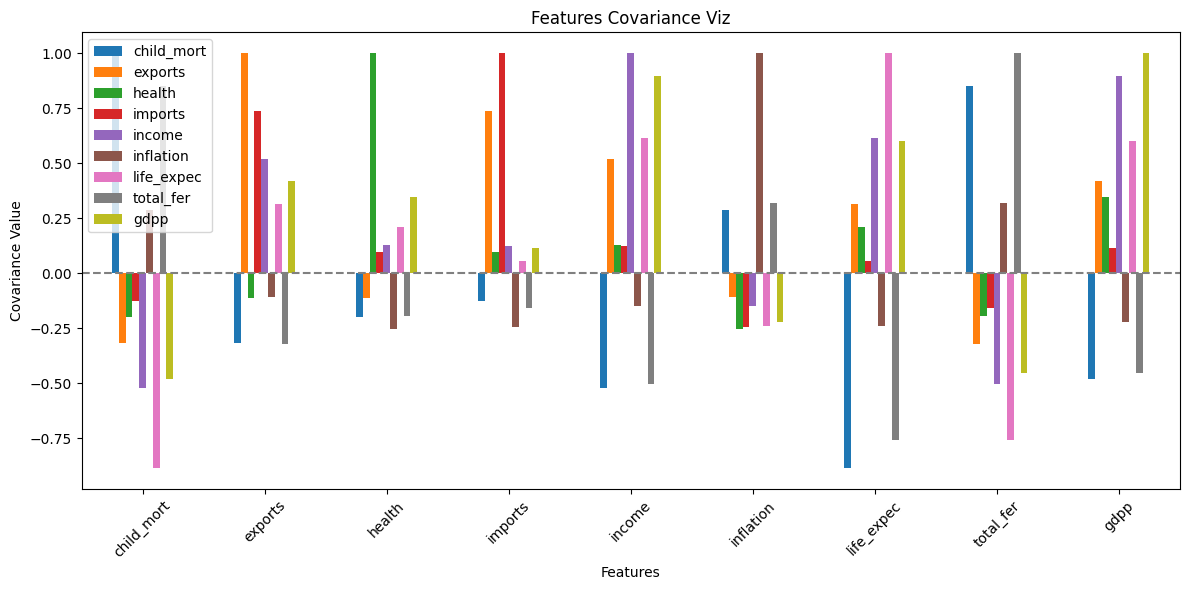

In [17]:
import matplotlib.pyplot as plt
std_cov = standard_df.cov()
features_viz = pd.DataFrame(std_cov, index=std_cov.columns)

features_viz.plot(kind='bar', figsize=(12, 6))
plt.title('Features Covariance Viz')
plt.xlabel('Features')
plt.ylabel('Covariance Value')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
def char_equation(matrix):
    size = len(covariance_matrix)
    identity = np.identity(size)
    
    determinant_coef = []
    
    for lambda_val in range(size + 1):
        terms = matrix - lambda_val * identity 
        determinant_coef.append(np.linalg.det(terms))
        
    return determinant_coef

In [19]:
values = char_equation(covariance_matrix)
values

[0.00073681088023014,
 0.00030254575789424133,
 13.402601583862968,
 969.7744998828204,
 2134.3743025652548,
 -112365.35700859356,
 -1278155.8466530237,
 -7752534.212681855,
 -33708484.08799833,
 -117667108.6754056]

# Computing EigenValues and EigenVectors

  - Next, I calculated **eigenvectors** (unit vectors that point in the direction of maximum variance) and **eigenvalues** (which represent the magnitude of variance).  
  - For this, I utilized NumPy's linear algebra functions and sorted the eigenvalues in descending order to ensure that the most significant components appeared first.


In [20]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues : ", eigenvalues)
print("Eigenvectors : ", eigenvectors)

Eigenvalues :  [4.13565658 1.54634631 1.1703833  0.99478456 0.66061903 0.22358112
 0.06687501 0.08831536 0.11343874]
Eigenvectors :  [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.3275418  -0.68274306 -0.07948854]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
   0.12308207 -0.01419742 -0.70730269]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.11308797  0.07249683 -0.24983051]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
  -0.09903717 -0.02894642  0.59218953]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
  -0.61298247  0.35262369  0.09556237]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.02523614 -0.01153775  0.10463252]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
  -0.29403981 -0.50466425  0.01848639]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.75068875
  

In [21]:
sorted_idices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idices]
eigenvectors = eigenvectors[:, sorted_idices]
print("Eigenvalues : ", eigenvalues)
print("Eigenvectors : ", eigenvectors)

Eigenvalues :  [4.13565658 1.54634631 1.1703833  0.99478456 0.66061903 0.22358112
 0.11343874 0.08831536 0.06687501]
Eigenvectors :  [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.07948854 -0.68274306 -0.3275418 ]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
  -0.70730269 -0.01419742  0.12308207]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.24983051  0.07249683 -0.11308797]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
   0.59218953 -0.02894642 -0.09903717]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
   0.09556237  0.35262369 -0.61298247]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.10463252 -0.01153775  0.02523614]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
   0.01848639 -0.50466425 -0.29403981]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.75068875
  

# Cumulative Variance

In [22]:
#Total variance is the sum of the eigenvalues of a covariance matrix
total_variance = sum(eigenvalues)

#Explained variance ratio refers to measure of proportion of total variance in dataset explained by each component
explained_variance_ratio = [(i / total_variance) for i in eigenvalues]

#Cumulative variance measures how much of a dataset's variance is represented by a certain number of principal components
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Total Variance: ", total_variance)
print("Explained Variance Ratio: ", explained_variance_ratio)
print("Cumulative Variance: ", cumulative_variance)

Total Variance:  9.000000000000004
Explained Variance Ratio:  [0.45951739786095874, 0.17181625651618201, 0.13004258896953086, 0.1105316180557193, 0.0734021142415603, 0.024842346764277448, 0.012604303981650281, 0.00981281737926154, 0.007430556230859523]
Cumulative Variance:  [0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232
 0.98275663 0.99256944 1.        ]


# Number of Components

In [23]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
n_components

6

- I set a threshold of **95% cumulative variance** and determined that **6 components** out of the original 9 features were sufficient to retain 95% of the information in the dataset.  

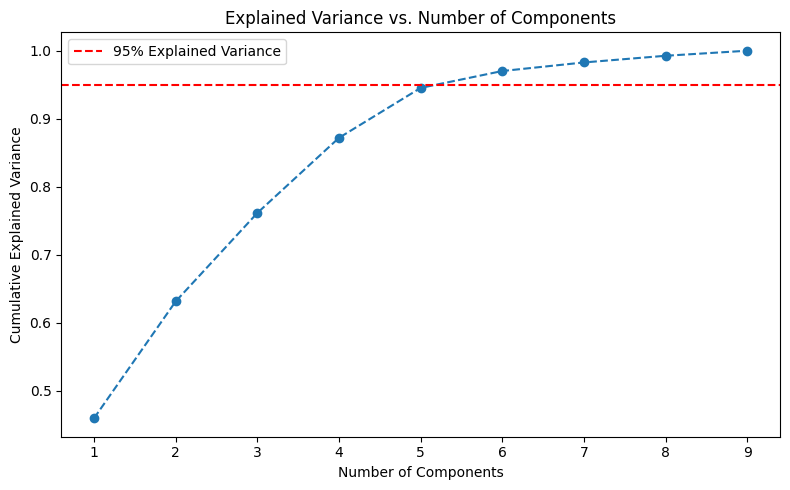

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.tight_layout()
plt.show()

**The components up to the 6th (with cumulative variance of 97.02%) are selected to explain at least 95% of the total variance, which is why n_components is 6.**

## PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components)
reduced_data = pca.fit_transform(standard_df)
reduced_data

array([[-2.90428986,  0.09533386, -0.71596521,  1.00224038, -0.15783535,
         0.25383403],
       [ 0.42862224, -0.58639208, -0.33248555, -1.15757715,  0.17415355,
        -0.08432502],
       [-0.28436983, -0.45380957,  1.21784212, -0.86551146,  0.15600546,
         0.40049102],
       ...,
       [ 0.49702956,  1.38657416, -0.23781089, -1.07087722,  1.17255418,
        -0.05145203],
       [-1.88179152, -0.10912482,  1.10642399,  0.05608809,  0.61651115,
         0.53929524],
       [-2.855476  ,  0.48454072,  0.22249741,  0.81391648, -0.27324593,
        -0.20077433]])

In [26]:
print("Explained Variance Ratios:", pca.explained_variance_ratio_)

Explained Variance Ratios: [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235]


In [27]:
## PCA INFORMATIONS 
pca_informations = pd.DataFrame({'Components' : [f'PC {i}' for i in range(reduced_data.shape[1])],
                                'eigen values' : pca.explained_variance_ , 
                                'explained variance (%)' :pca.explained_variance_*100,
                                'explained variance commule (%)' : [sum(pca.explained_variance_ratio_[:i])*100 for i in range(1,reduced_data.shape[1]+1)]
                                })
pca_informations

,Components,eigen values,explained variance (%),explained variance commule (%)
0,PC 0,4.135657,413.565658,45.951740
1,PC 1,1.546346,154.634631,63.133365
2,PC 2,1.170383,117.038330,76.137624
3,PC 3,0.994785,99.478456,87.190786
4,PC 4,0.660619,66.061903,94.530998
5,PC 5,0.223581,22.358112,97.015232


In [28]:
df_with_country = standard_df.copy()

# Clustering after PCA

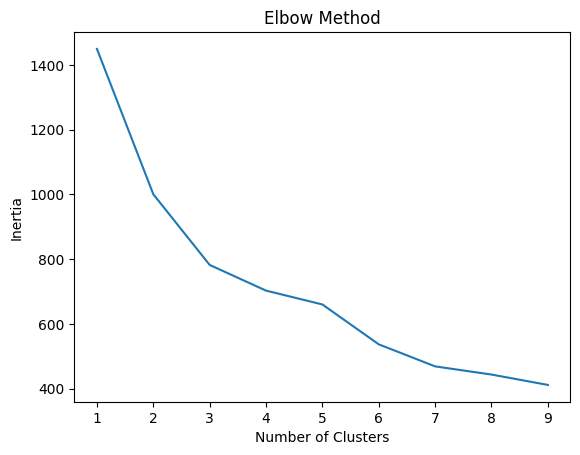

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)  
df_with_country['Cluster'] = kmeans.fit_predict(reduced_data)

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 10), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

 - Using the **6 principal components**, I applied the **K-means clustering algorithm**. The **Elbow Method** was used to determine the optimal number of clusters, which turned out to be **4**.  


In [30]:
print("Explained Variance Ratios:", pca.explained_variance_ratio_)

Explained Variance Ratios: [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235]


In [31]:
df_with_country['country'] = df['country']

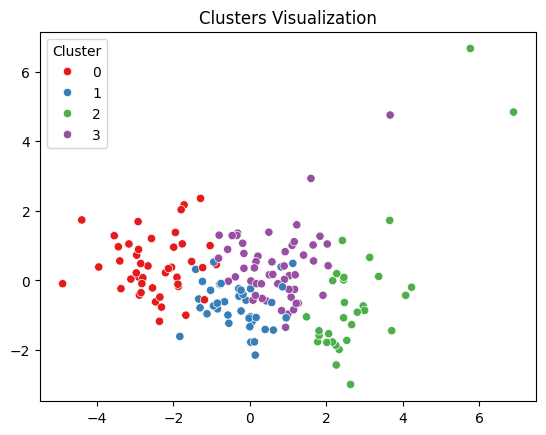

In [32]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_with_country['Cluster'], palette='Set1')
plt.title('Clusters Visualization')
plt.show()

### Why choose 3 PCA for Visualizaton ?

1. **Cumulative Variance for PCA1 and PCA2**:
   - PCA1: **45.95%**
   - PCA2: **17.18%**
   - Together, PCA1 and PCA2 explain **63.13%** of the total variance.

2. **Common Guidelines**:
   - For dimensionality reduction or visualization, it’s generally desirable to retain at least **70%-80%** of the variance.
   - With PCA1 and PCA2 explaining only **63.13%**, some significant information (about 37%) is lost if we stop at 2 components.

3. **Adding PCA3**:
   - With PCA3 included, the cumulative variance increases to **76.14%**, which captures more information and may provide better insights.

---

# 3D Visualization

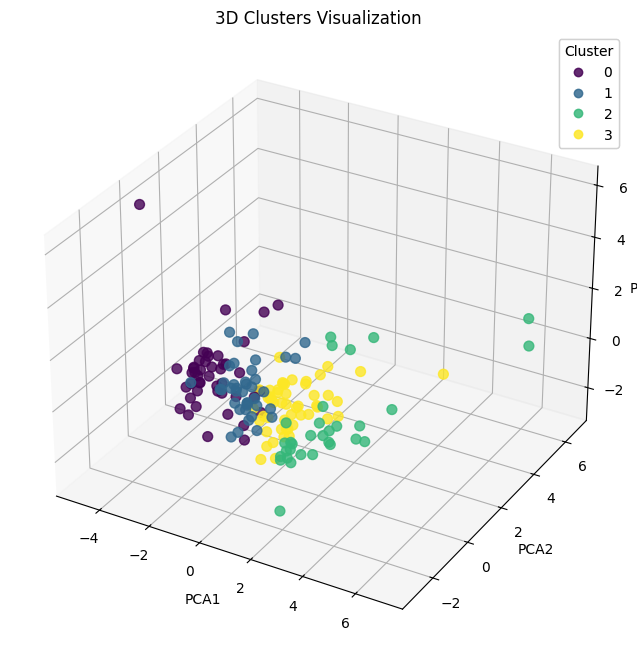

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for PCA1, PCA2, PCA3
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], 
                     c=df_with_country['Cluster'], cmap='viridis', s=50, alpha=0.8)

    
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D Clusters Visualization")

legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()

### Corrected Interpretation of Clusters:
1. **Cluster 0 (Purple)**:
   - Points are densely packed and close to the origin.
   - Likely represents **developing regions**, as the small spread in principal components might indicate limited variability in factors contributing to development.

2. **Cluster 1 (Blue)**:
   - A few points scattered far from the origin, implying high variability.
   - Likely represents **highly developed regions**, as such regions often show greater outliers due to higher variability in socio-economic factors.

3. **Cluster 2 (Green)**:
   - Moderately spread but still distinct.
   - Likely represents **developed regions** with balanced variability and indicators.

4. **Cluster 3 (Yellow)**:
   - Widely spread, indicating diversity in its principal components.
   - Likely represents **underdeveloped regions**, as there is variability, but not as compact as a highly developed region.

---

### Mapping Clusters to Development Stages:
- **Underdeveloped**: Cluster 3 (Yellow)  
- **Developing**: Cluster 0 (Purple)  
- **Developed**: Cluster 2 (Green)  
- **Highly Developed**: Cluster 1 (Blue)  

---

In [34]:
cluster_mapping = {0: "Developing", 1: "Highly Developed", 2: "Developed", 3: "Underdeveloped"}

# Apply the mapping to your cluster labels
df_with_country['Cluster Name'] = df_with_country['Cluster'].map(cluster_mapping)

In [35]:
df_with_country['Cluster Name'].value_counts()

Cluster Name
Underdeveloped      52
Developing          45
Highly Developed    39
Developed           31
Name: count, dtype: int64

# Project Insights

- **Dataset Aim**:  
  The main objective of the dataset was to identify countries where the CEO should focus efforts and prioritize development initiatives.  


In [36]:
temp = df_with_country[['Cluster', 'country', 'Cluster Name']]

In [37]:
result_df = pd.merge(df, temp, how='inner', left_on=['country'], right_on=['country'])
result_df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster Name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,Underdeveloped
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,Highly Developed


# Findings

- Based on clustering results, I identified **97 countries** as either **underdeveloped** or **developing**, requiring immediate attention and investment.  
  - A final **result_data** was created to highlight these countries, making it easier for the CEO to focus on areas requiring the highest priority.  


In [39]:
result_data = result_df[(result_df['Cluster Name'].isin(['Underdeveloped','Developing']))]
result_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster Name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,3,Underdeveloped
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3,Underdeveloped
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3,Underdeveloped
...,...,...,...,...,...,...,...,...,...,...,...,...
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.400,70.4,1.44,2970,3,Underdeveloped
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970,3,Underdeveloped
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.100,73.1,1.95,1310,3,Underdeveloped
165,Yemen,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310,0,Developing
